In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df=pd.read_csv("C:\\Users\\user\\Downloads\\hospital data analysis.csv")
print(df)

     Patient_ID  Age  Gender          Condition                  Procedure  \
0             1   45  Female      Heart Disease                Angioplasty   
1             2   60    Male           Diabetes            Insulin Therapy   
2             3   32  Female      Fractured Arm           X-Ray and Splint   
3             4   75    Male             Stroke     CT Scan and Medication   
4             5   50  Female             Cancer   Surgery and Chemotherapy   
..          ...  ...     ...                ...                        ...   
979         996   68    Male       Hypertension  Medication and Counseling   
980         997   45  Female       Appendicitis               Appendectomy   
981         998   40    Male      Fractured Leg  Cast and Physical Therapy   
982         999   78  Female       Heart Attack    Cardiac Catheterization   
983        1000   25    Male  Allergic Reaction      Epinephrine Injection   

      Cost  Length_of_Stay Readmission    Outcome  Satisfaction

In [2]:
print(df)
print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)
print(df.isnull().sum())

     Patient_ID  Age  Gender          Condition                  Procedure  \
0             1   45  Female      Heart Disease                Angioplasty   
1             2   60    Male           Diabetes            Insulin Therapy   
2             3   32  Female      Fractured Arm           X-Ray and Splint   
3             4   75    Male             Stroke     CT Scan and Medication   
4             5   50  Female             Cancer   Surgery and Chemotherapy   
..          ...  ...     ...                ...                        ...   
979         996   68    Male       Hypertension  Medication and Counseling   
980         997   45  Female       Appendicitis               Appendectomy   
981         998   40    Male      Fractured Leg  Cast and Physical Therapy   
982         999   78  Female       Heart Attack    Cardiac Catheterization   
983        1000   25    Male  Allergic Reaction      Epinephrine Injection   

      Cost  Length_of_Stay Readmission    Outcome  Satisfaction

In [3]:
df.drop(["Satisfaction"],axis=1,inplace=True)
print(df)

     Patient_ID  Age  Gender          Condition                  Procedure  \
0             1   45  Female      Heart Disease                Angioplasty   
1             2   60    Male           Diabetes            Insulin Therapy   
2             3   32  Female      Fractured Arm           X-Ray and Splint   
3             4   75    Male             Stroke     CT Scan and Medication   
4             5   50  Female             Cancer   Surgery and Chemotherapy   
..          ...  ...     ...                ...                        ...   
979         996   68    Male       Hypertension  Medication and Counseling   
980         997   45  Female       Appendicitis               Appendectomy   
981         998   40    Male      Fractured Leg  Cast and Physical Therapy   
982         999   78  Female       Heart Attack    Cardiac Catheterization   
983        1000   25    Male  Allergic Reaction      Epinephrine Injection   

      Cost  Length_of_Stay Readmission    Outcome  
0    15000 

In [4]:
e=LabelEncoder()
df["Gender"]=e.fit_transform(df["Gender"])
df["Condition"]=e.fit_transform(df["Condition"])
df["Procedure"]=e.fit_transform(df["Procedure"])
df["Readmission"]=e.fit_transform(df["Readmission"])
df["Outcome"]=e.fit_transform(df["Outcome"])
print(df)

     Patient_ID  Age  Gender  Condition  Procedure   Cost  Length_of_Stay  \
0             1   45       0          8          0  15000               5   
1             2   60       1          4          8   2000               3   
2             3   32       0          5         14    500               1   
3             4   75       1         14          3  10000               7   
4             5   50       0          2         13  25000              10   
..          ...  ...     ...        ...        ...    ...             ...   
979         996   68       1          9         10   1000              70   
980         997   45       0          1          2   8000              72   
981         998   40       1          6          5   3000              72   
982         999   78       0          7          4  18000              74   
983        1000   25       1          0          7    100              68   

     Readmission  Outcome  
0              0        0  
1              1   

In [5]:
x=df.drop("Readmission",axis=1)
y=df["Readmission"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(x_train))
print(len(y_train))
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


787
787


In [6]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:{:.2f}%".format(accuracy * 100))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\nclassification report:\n", classification_report(y_test,y_pred))

Accuracy:87.31%
confusion matrix:
 [[128  10]
 [ 15  44]]

classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       138
           1       0.81      0.75      0.78        59

    accuracy                           0.87       197
   macro avg       0.85      0.84      0.84       197
weighted avg       0.87      0.87      0.87       197



        Patient_ID         Age      Gender   Condition   Procedure  \
count   984.000000  984.000000  984.000000  984.000000  984.000000   
mean    500.329268   53.754065    0.467480    6.982724    6.992886   
std     288.979531   14.941135    0.499195    4.320891    4.319978   
min       1.000000   25.000000    0.000000    0.000000    0.000000   
25%     250.750000   45.000000    0.000000    3.000000    3.000000   
50%     500.500000   55.000000    0.000000    7.000000    7.000000   
75%     750.250000   65.000000    1.000000   11.000000   11.000000   
max    1000.000000   78.000000    1.000000   14.000000   14.000000   

               Cost  Length_of_Stay  Readmission     Outcome  
count    984.000000      984.000000   984.000000  984.000000  
mean    8367.479675       37.663618     0.268293    0.399390  
std     7761.990976       19.595805     0.443296    0.490022  
min      100.000000        1.000000     0.000000    0.000000  
25%     1000.000000       21.000000     0.000000    0.

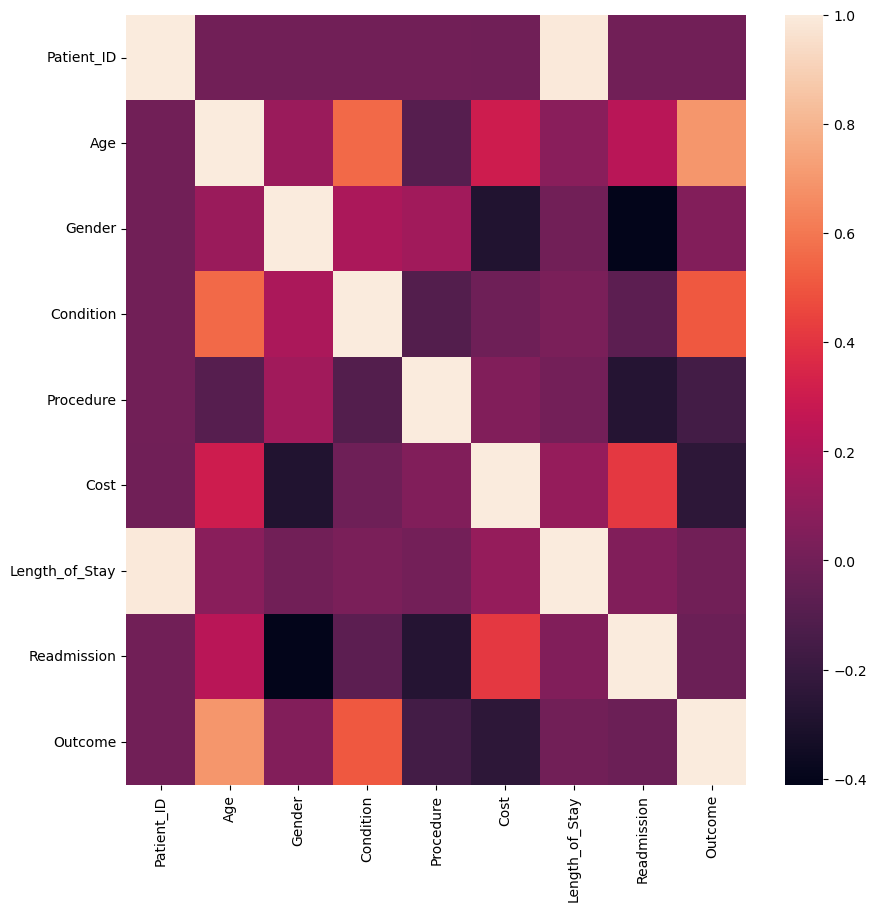

In [7]:
print(df.describe())
print(df.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()